# Preparing the environment

Retrieve Data

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!rm -r images

rm: cannot remove 'images': No such file or directory


In [ ]:
!unzip -n /content/drive/MyDrive/images.zip > /dev/null

In [ ]:
!ls images

bad  good


# Retrieving Data

In [ ]:
from dataclasses import dataclass
import numpy as np
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import os
from random import shuffle

In [ ]:
num_classes = 2

class ApartmentsDataset:
  def __init__(self, root: Path, transform=None):
    self._root = root
    self.bad_condition_images = list(self._root.glob("bad/*.png"))
    self.good_condition_images = list(self._root.glob("good/*.png"))

    self._image_list = self.bad_condition_images + self.good_condition_images
    shuffle(self._image_list)
    self._transform = transform

  def __len__(self) -> int:
    return len(self._image_list)

  def getitem(self, index: int) -> dict:
    img_path = self._image_list[index]
    standard_num = 1 if 'good' in str(img_path) else 0
    standard_vec = np.zeros((num_classes))
    standard_vec[standard_num] = 1
    image = cv2.imread(str(img_path))
    return {"image": image, "standard": standard_vec}

  def drop_image(self, index: int):
    img_path = self._image_list[index]
    print(img_path)
    if os.path.exists(img_path):
      os.remove(img_path)

  def __getitem__(self, index: int) -> dict:
    item = self.getitem(index)
    if self._transform is None:
      return item
    else:
      return self._transform(**item)

  def get_good_apartment(self):
    return self.good_condition_images

  def get_bad_apartment(self):
    return self.bad_condition_images


In [ ]:
# delete all paths with invlaid (None) images
dataset = ApartmentsDataset(Path("images"))
for index in range(len(dataset)):
  if dataset[index]['image'] is None:
    dataset.drop_image(index)

images/good/otodom-62964200-1.png


In [ ]:
dataset = ApartmentsDataset(Path("images"))

# Analysing Data

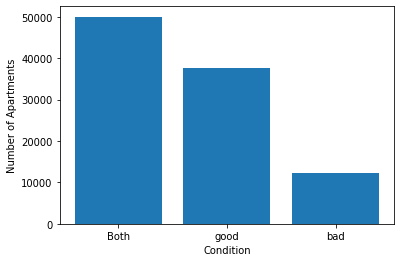

In [ ]:
num_all_apartments = len(dataset) 
num_good_apartments = len(dataset.get_good_apartment())
num_bad_apartments = len(dataset.get_bad_apartment())
x = ('Both', 'good', 'bad')
y = (num_all_apartments, num_good_apartments, num_bad_apartments)
plt.xlabel('Condition')
plt.ylabel('Number of Apartments')
plt.bar(x,y)
plt.show()

In [ ]:
dataset[0]['standard']

array([0., 1.])

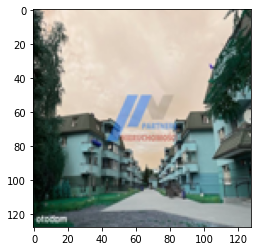

In [ ]:
plt.imshow(dataset[0]['image'])

In [ ]:
pic = dataset[0]['image']
print('Shape of the image : {}'.format(pic.shape)) 
print('Image Height {}'.format(pic.shape[0])) 
print('Image Width {}'.format(pic.shape[1])) 
print('Dimension of Image {}'.format(pic.ndim))
print('Maximum RGB value in this image {}'.format(pic.max())) 
print('Minimum RGB value in this image {}'.format(pic.min()))

Shape of the image : (128, 128, 3)
Image Height 128
Image Width 128
Dimension of Image 3
Maximum RGB value in this image 251
Minimum RGB value in this image 0


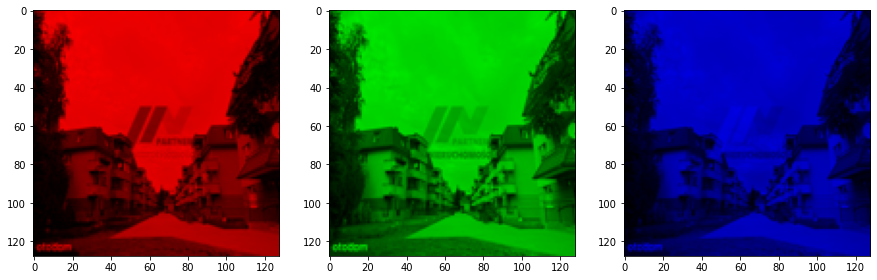

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))  
for c, ax in zip(range(3), ax):     
     # create zero matrix        
     split_img = np.zeros(pic.shape, dtype="uint8") 
     # 'dtype' by default: 'numpy.float64'  # assing each channel      
     split_img[ :, :, c] = pic[ :, :, c] # display each channel     
     ax.imshow(split_img)

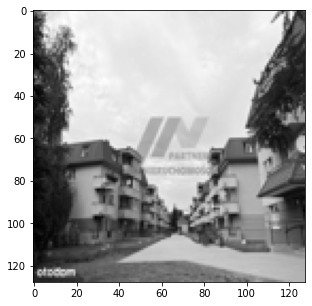

In [ ]:
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114])   
gray = gray(pic) 
plt.figure( figsize = (5,5))  
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray')) 
plt.show()

In [ ]:
def count_white_pixels(image):
    dst = cv2.inRange(image, np.array([245,245,245], dtype=np.uint8), np.array([255,255,255], dtype=np.uint8))
    return cv2.countNonZero(dst)

ratio_all_images = []
null_images = 0
for item in dataset:
  image = item['image']
  height, width = image.shape[0], image.shape[1]
  total_pixels = height * width
  num_of_white_pixels = count_white_pixels(image)
  ratio = (num_of_white_pixels / total_pixels) * 100
  ratio_all_images += [ratio]


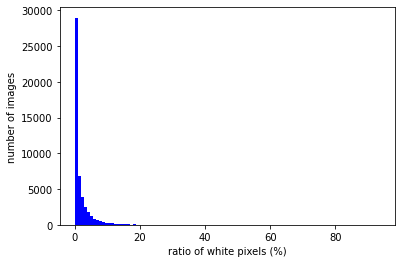

In [ ]:
plt.hist(ratio_all_images, 100, color='blue')
plt.xlabel('ratio of white pixels (%)')
plt.ylabel('number of images')
plt.show()

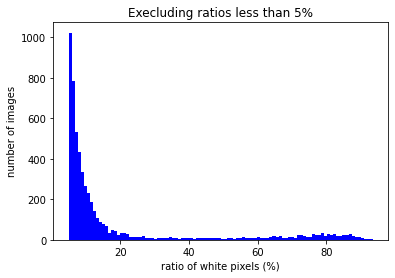

In [ ]:
plt.hist(list(filter(lambda x: x > 5, ratio_all_images)), 100, color='blue')
plt.title('Execluding ratios less than 5%')
plt.xlabel('ratio of white pixels (%)')
plt.ylabel('number of images')
plt.show()

# Cleaning Data

In [ ]:
uncleaned_data_indices = []
threshold = 25
for index, sample in enumerate(dataset):
  if ratio_all_images[index] > threshold:
    uncleaned_data_indices.append(index)

number of uncleaned data = 1006


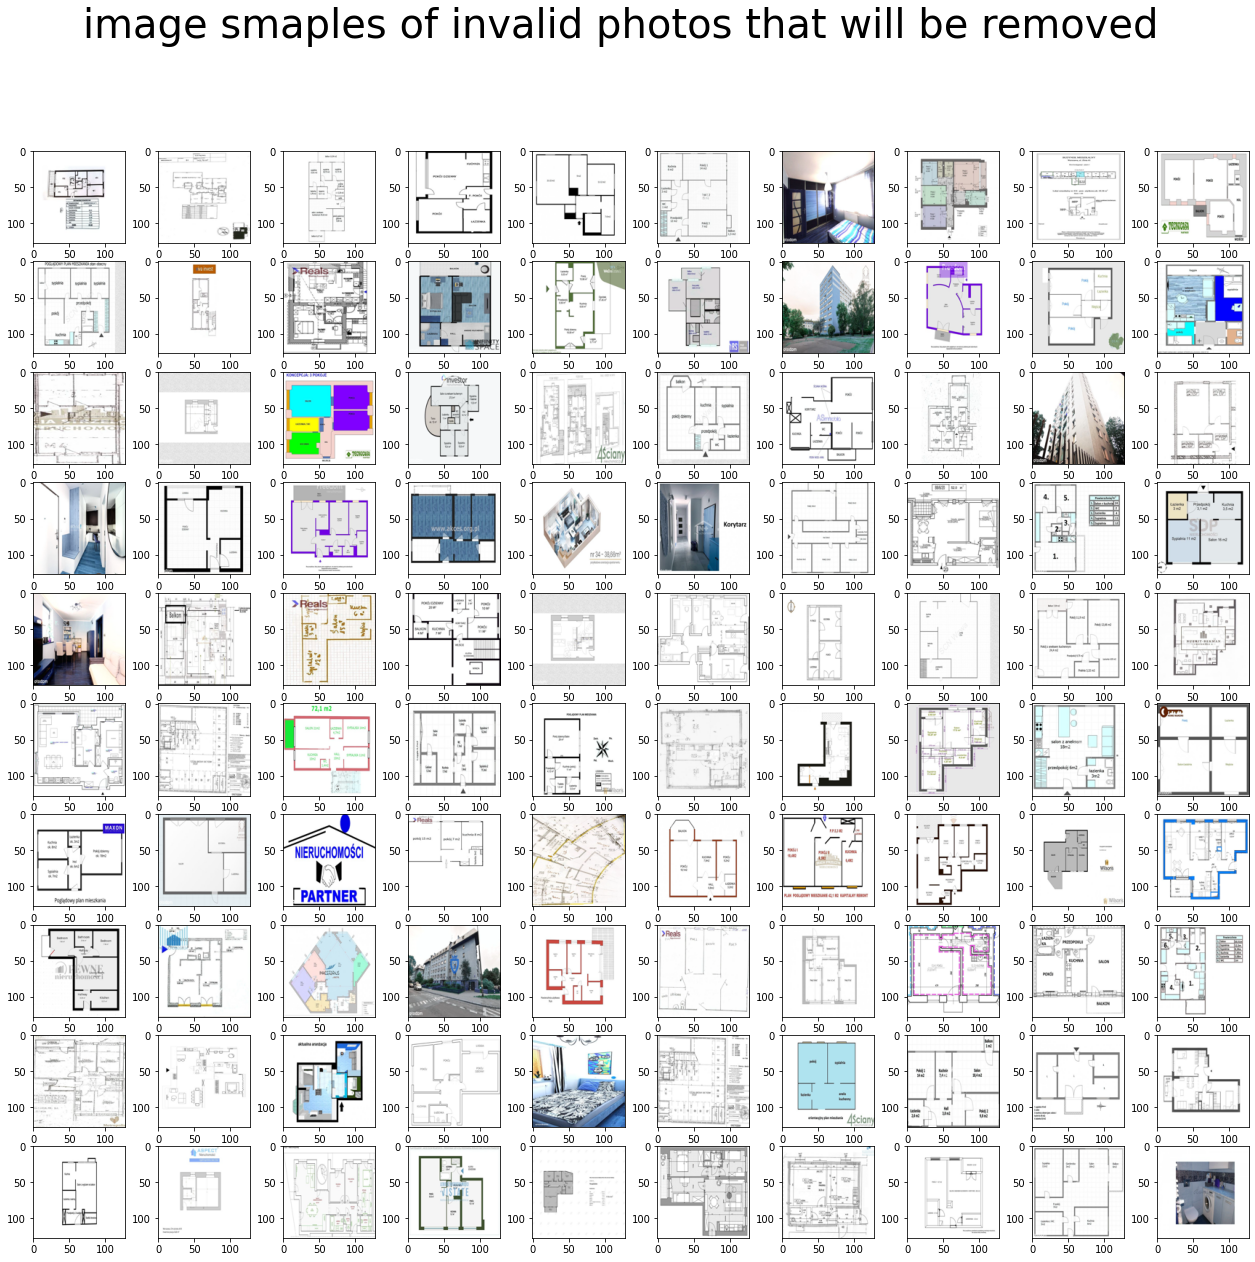

In [ ]:
print(f'number of uncleaned data = {len(uncleaned_data_indices)}')

fig = plt.figure(figsize=(22, 20))
fig.suptitle('image smaples of invalid photos that will be removed', fontsize=40)
columns = 10
rows = 10
for i in range(1, columns*rows + 1):
    if len(uncleaned_data_indices) <= i:
      break
    img = dataset[uncleaned_data_indices[i]]['image']
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [ ]:
for index in uncleaned_data_indices:
  dataset.drop_image(index)

images/bad/otodom-63061626-2.png
images/bad/otodom-63434376-3.png
images/bad/-morizon-108625-78-OMS-mzn2040897198-2.png
images/good/otodom-63278036-2.png
images/good/otodom-63371127-4.png
images/good/otodom-63137247-1.png
images/bad/otodom-63218055-1.png
images/good/otodom-63385343-3.png
images/good/otodom-63346676-2.png
images/good/otodom-63220620-3.png
images/bad/otodom-63409956-1.png
images/good/-morizon-M-88037-16-mzn2040812004-2.png
images/bad/otodom-63402001-0.png
images/bad/otodom-62914447-4.png
images/good/otodom-63268005-1.png
images/good/-morizon-244-12532-OMS-mzn2040744216-2.png
images/bad/otodom-62602127-0.png
images/good/otodom-63450978-0.png
images/good/otodom-62704970-1.png
images/bad/-morizon-IDE-MS-1388-mzn2040917427-0.png
images/bad/otodom-63315735-1.png
images/good/-morizon-16747-2113-OMS-mzn2040393404-1.png
images/bad/otodom-63427512-2.png
images/good/otodom-63223126-2.png
images/good/otodom-63327391-4.png
images/good/-morizon-58227-3098-OMS-mzn2039039412-1.png
imag

# Splitting dataset folder 

In [ ]:
import shutil


def get_files_from_folder(path):
    files = os.listdir(path)
    return np.asarray(files)

def move_images(path_to_data, path_to_test_data, train_ratio):
    # get dirs
    _, dirs, _ = next(os.walk(path_to_data))

    # calculates how many train data per class
    data_counter_per_class = np.zeros((len(dirs)))
    for i in range(len(dirs)):
        path = os.path.join(path_to_data, dirs[i])
        files = get_files_from_folder(path)
        data_counter_per_class[i] = len(files)
    test_counter = np.round(data_counter_per_class * (1 - train_ratio))

    # transfers files
    for i in range(len(dirs)):
        path_to_original = os.path.join(path_to_data, dirs[i])
        path_to_save = os.path.join(path_to_test_data, dirs[i])

        #creates dir
        if not os.path.exists(path_to_save):
            os.makedirs(path_to_save)
        files = get_files_from_folder(path_to_original)
        # moves data
        for j in range(int(test_counter[i])):
            dst = os.path.join(path_to_save, files[j])
            src = os.path.join(path_to_original, files[j])
            shutil.move(src, dst)

In [ ]:
move_images("./images", "./test_images", 0.7)
dataset = ApartmentsDataset(Path("images"))